# L8.2 Bootstrap

Key concepts: Parametric bootstrap, non-parametric bootstrap on a random variable. Non-parametric bootstrap on regression.

In [10]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

Perform maximum likelihood on a sample of 200 exponential random variables.

In [14]:
NObservations <- 200
observations = rexp(NObservations,rate=2.63)

rate_hat <- 1/mean(observations)

rate_hat

rate_hatOriginal = rate_hat # save for later, when we do parametric bootstrap

[1] 2.226035

Example: Use maximum likelihood to estimate the parameter of a exponential distribution.

From simulated data: To estimate the distribution of the estimator, we could repeat the simulation many times.

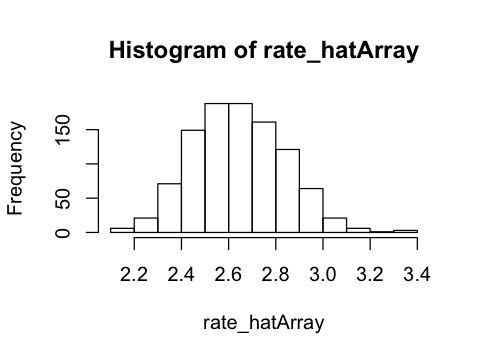

In [15]:
# In this case, imagine (unrealistically) being able to repeat the experiments with N=200 samples, 1000 times.

NResimulate <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iSimulation in 1:NResimulate){
    
    NObservations <- 200
    observations = rexp(NObservations,rate=2.63) # Note these simulations use the true value - this is what you can't do in real life.

    rate_hat <- 1/mean(observations)

    rate_hatArray[iSimulation] = rate_hat
    
}

hist(rate_hatArray)

In [16]:
sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.025, 0.975))

[1] 0.1923104

0%      25%      50%      75%     100% 
2.100458 2.501564 2.637830 2.780649 3.355903

2.5%    97.5% 
2.297615 3.029278

## Parametric bootstrap

If we have high confidence in the model and the estimate of the parameter, we can simulate data and repeat the estimation process. This is called __parametric bootstrap__. Note this requires the ability to forward-simulate the probability model.

[1] 0.1606669

0%      25%      50%      75%     100% 
1.742655 2.128949 2.227134 2.337995 2.895660

2.5%    97.5% 
1.943395 2.564415

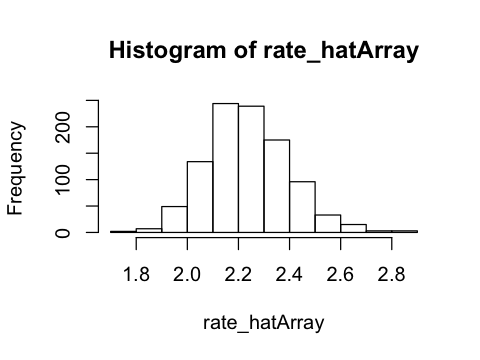

In [17]:
NResimulate <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iSimulation in 1:NResimulate){
    
    NObservations <- 200
    observations = rexp(NObservations,rate=rate_hatOriginal) # Note these simulations use the ESTIMATED value

    rate_hat <- 1/mean(observations)

    rate_hatArray[iSimulation] = rate_hat
    
}

hist(rate_hatArray)

sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.025, 0.975))

## Non-parametric Bootstrap

In reality, we might not have high confidence in the model, or it might be difficult or impossible to forward-simulate the model.

So, alternatively, we can resample with replacement from the data, and repeat the estimation process. This is called __non-parametric bootstrap__. Note this does not require the ability to forward-simulate the model.

[1] 0.1486028

0%      25%      50%      75%     100% 
1.857828 2.166637 2.265265 2.364276 2.767453

5%      95% 
2.033988 2.516223

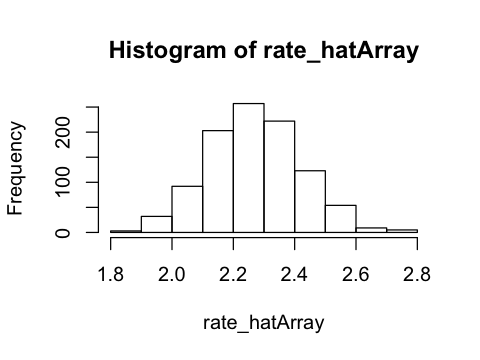

In [18]:
NResample <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iResample in 1:NResample){

    NObservations <- 200
    resampledObservations <- sample(observations, size=NObservations, replace = TRUE)
   
    # parameter estimation technique goes here
    rate_hat <- 1/mean(resampledObservations)
    
    rate_hatArray[iResample] = rate_hat
    
}


hist(rate_hatArray)

sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.05, 0.95))

---

## Non-parametric boostrap on linear regression

Non-parametric bootstrap is extremely general. For any inference algorithm, if a resampling of the data can be made, bootstrap can be used.

Let's use it on linear regression.

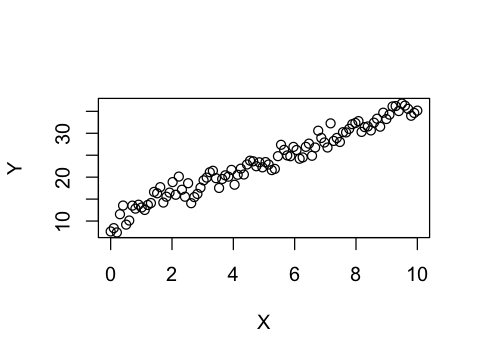

In [19]:
# Simulate some linear data with noise
N <- 100
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=N)
eps <- rnorm(N,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)

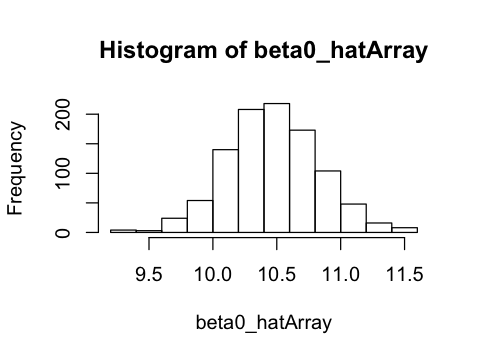

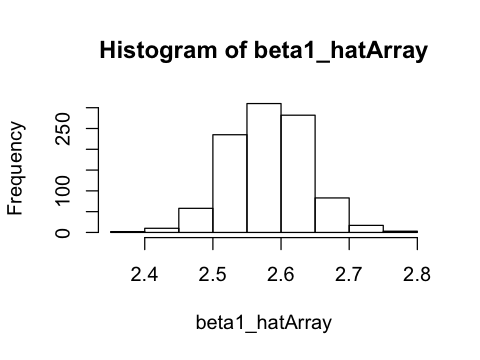

In [20]:
NResample <- 1000

# initialize an array to store all the estimates
beta0_hatArray <-0
beta1_hatArray <-0

for (iResample in 1:NResample){

    thisSampleRows <- sample(NResample, replace = TRUE) # which rows of X and Y to take in this resample
    Y_thisSample = Y[thisSampleRows]
    X_thisSample = X[thisSampleRows]
    
    # parameter estimation technique goes here
    thisFit = lm(Y_thisSample~X_thisSample)
    
    beta0_hatArray[iResample] = coef(thisFit)[1]
    beta1_hatArray[iResample] = coef(thisFit)[2]
    
}

hist(beta0_hatArray)
hist(beta1_hatArray)
